In [780]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [781]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

from scipy.stats import shapiro, normaltest, ttest_rel, ttest_ind, kstest
from scipy.stats import logistic,  loggamma, norm
from scipy.stats import ks_2samp, chi2_contingency

from statsmodels.graphics.gofplots import qqplot

import xgboost as xgb, lightgbm as lgbm, catboost as catb
from sklearn.decomposition import PCA 

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

Загрузка данных

In [782]:
# input
train = pd.read_csv("./Data/train.csv", sep=",")
test = pd.read_csv("./Data/test.csv", sep=",")

In [783]:
# output
TRAIN_FULL_PATH = 'training_project_train_full.csv'
TRAIN_PART_PATH = 'training_project_train_part_b.csv'
TEST_PART_PATH = 'training_project_test_part.csv'

SCALER_FILE_PATH = 'scaler.pkl'

Файл сохранения предсказания

In [784]:
name_pred = "KuznetsovVV_predictions"

Исследование данных

In [785]:
train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [786]:
test.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,1.987000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,1142.000000,2497.000000,2.500000e+03,2.500000e+03,2500.000000,1987.000000
mean,1.366922e+06,0.035200,11.184400,18.325920,7.105704e+05,0.162000,34.181261,0.106928,1.215572e+07,2.963966e+05,18271.340000,1234.516860
std,9.171252e+05,0.386291,4.852774,7.254659,1.511983e+06,0.559894,22.024277,0.357189,3.226097e+07,3.783020e+05,11543.881469,1740.219442
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.000000
25%,8.523115e+05,0.000000,8.000000,13.400000,2.785860e+05,0.000000,16.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,710.000000
50%,1.178475e+06,0.000000,10.000000,17.000000,4.786760e+05,0.000000,30.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,731.000000
75%,1.629734e+06,0.000000,14.000000,22.100000,8.025985e+05,0.000000,50.000000,0.000000,5.225825e+05,3.663485e+05,24146.000000,743.000000
max,1.497561e+07,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.000000e+08,6.030087e+06,93555.000000,7480.000000


In [787]:
train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [788]:
test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [789]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [790]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [791]:
train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

Проверка на выбросы

In [792]:
train['Home Ownership'].unique()

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

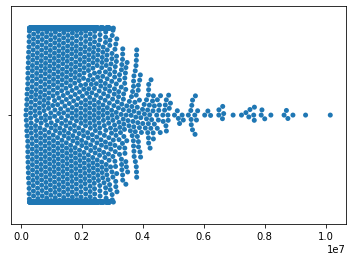

In [793]:
sns.swarmplot(x=train['Annual Income'].unique())

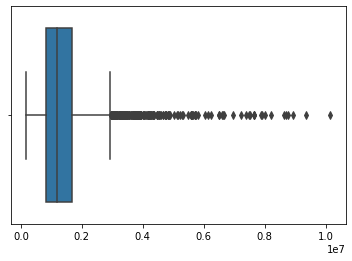

In [794]:
sns.boxplot(x=train['Annual Income'].unique()) # Возможно

In [795]:
train['Years in current job'].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [796]:
train['Tax Liens'].unique()

array([0., 3., 1., 2., 4., 6., 5., 7.])

In [797]:
train['Number of Open Accounts'].unique()

array([11., 15.,  8., 13., 12.,  9., 17., 10.,  7.,  6., 14.,  3., 20.,
       19., 22., 18.,  5., 16.,  4.,  2., 23., 24., 21., 25., 32., 33.,
       31., 30., 29., 28., 26., 27., 43., 41., 34., 38., 35., 37., 42.])

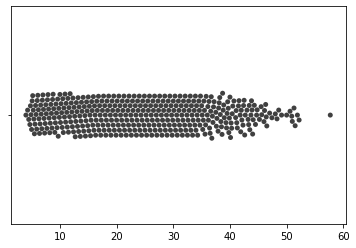

In [798]:
sns.swarmplot(x=train['Years of Credit History'].unique(), color=".25") # Возможен 1 выброс

In [799]:
train['Years of Credit History'].unique()

array([26.3, 15.3, 35. , 22.5, 13.6, 14.6, 20.3, 12. , 15.7, 24.6, 11.5,
       17.6, 14. , 17.7, 18.4, 17.8, 28.5, 29. , 12.5, 26.5, 34.4, 28.3,
       14.8, 25. , 29.8, 15.8, 14.5, 19.5, 18.6, 20.5, 21. , 10.2, 31.4,
       18. ,  7.6, 23.7, 15. , 10.9,  9.4, 15.4, 21.4, 27.3, 18.7, 17. ,
       22.2, 10.4,  9.5, 19.2, 16.3, 21.2, 10.7, 17.3, 12.9, 16. , 16.6,
       15.6, 13.3, 11.3, 17.5, 13.1, 12.1, 32.5, 12.7,  9. , 18.1, 36.8,
       16.5, 16.4, 17.2, 32. , 19.4, 16.9, 17.9,  6.1, 11.4, 20.6,  8.9,
       39.6,  8.5, 18.8, 31.3, 22.4, 11.9, 23.9, 16.7, 13.8, 15.2,  8. ,
       23.8, 12.2,  6. ,  6.4,  9.8, 10.3, 21.7, 13.2, 33.6, 14.3, 19.1,
       14.1, 23. , 15.5, 20.4, 20.7, 20.1,  9.7,  7.8, 16.8, 20.8, 33.7,
       14.2, 20.2, 31.7, 25.5, 23.3, 21.1, 14.7, 24.5, 39.3, 34. ,  4.8,
        9.1, 10.1, 23.4,  9.9, 19.7, 10.5, 29.4, 30. , 19.9,  8.8, 10.6,
       26. , 20.9, 26.8, 10.8, 25.7, 40.3, 14.4, 31. , 21.5, 26.4, 23.6,
       10. ,  9.6, 21.8, 23.1, 38.7, 26.6, 11.8, 24

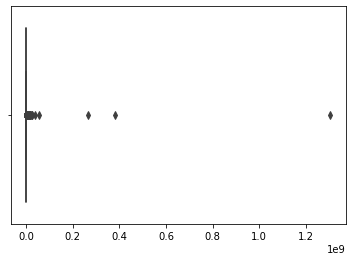

In [800]:
sns.boxplot(train['Maximum Open Credit'].unique()) # - Вероятней всего выбросы

In [801]:
train['Number of Credit Problems'].unique()

array([1., 0., 3., 2., 6., 4., 5., 7.])

In [802]:
train['Months since last delinquent'].unique()

array([ nan,  73.,  18.,   6.,  40.,  44.,  45.,  17.,  61.,  14.,  11.,
        32.,  75.,  65.,  10.,  28.,  35.,  29.,  13.,   8.,  71.,  54.,
        21.,  68.,  51.,  70.,  19.,  22.,  16.,  38.,  36.,   0.,  34.,
        30.,   3.,  52.,  72.,  63.,  23.,   5.,  60.,  59.,   1.,  74.,
         4.,  42.,  39.,  41.,  55.,  67.,  37.,  47.,  26.,  76.,  43.,
        12.,   7.,  77.,  48.,  79.,  80.,  31.,  64.,  78.,  20.,  58.,
        49.,   9.,  69.,  25.,  33.,  15.,  57.,  86.,  62.,   2.,  24.,
        56.,  82.,  66.,  46.,  27.,  50.,  53.,  81.,  83., 118.,  84.,
        91.,  92.])

In [803]:
train['Bankruptcies'].unique()

array([ 1.,  0.,  3., nan,  2.,  4.])

In [804]:
train['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

In [805]:
train['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

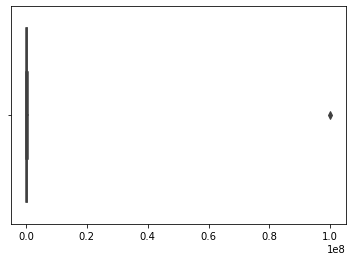

In [806]:
sns.boxplot(train['Current Loan Amount'].unique()) #Выброс

Судя по графику видна закономерность.

In [807]:
train['Current Loan Amount'].unique().max()

99999999.0

In [808]:
train.loc[train['Current Loan Amount'] == 99999999.0].count() #Видимо системный выброс

Home Ownership                  870
Annual Income                   870
Years in current job            829
Tax Liens                       870
Number of Open Accounts         870
Years of Credit History         870
Maximum Open Credit             870
Number of Credit Problems       870
Months since last delinquent    371
Bankruptcies                    867
Purpose                         870
Term                            870
Current Loan Amount             870
Current Credit Balance          870
Monthly Debt                    870
Credit Score                    870
Credit Default                  870
dtype: int64

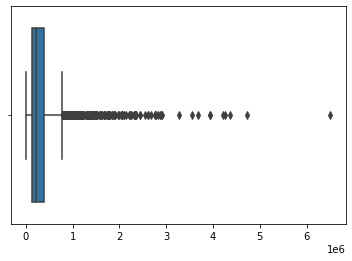

In [809]:
sns.boxplot(train['Current Credit Balance'].unique()) # Возможно

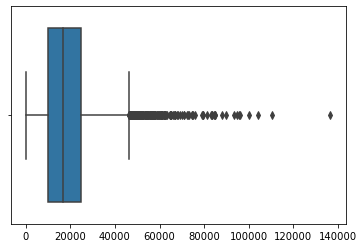

In [810]:
sns.boxplot(train['Monthly Debt'].unique()) # Возможно

Проверка на работоспособность при данных без пропусков

In [811]:
train_probe = train[(train.isnull().any(axis=1) != True)]

In [812]:
train.loc[train['Credit Score'] > 3000, 'Credit Score'] = train['Credit Score'] / 10 # Понижение с 0,30 до 0,12

In [813]:
train.loc[train['Credit Score'].isnull()]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
5,Rent,NaN,7 years,0.0,12.0,14.6,366784.0,0.0,NaN,0.0,other,Long Term,337304.0,165680.0,18692.0,NaN,1
8,Home Mortgage,NaN,5 years,0.0,17.0,15.7,0.0,1.0,NaN,1.0,home improvements,Short Term,129734.0,19.0,17.0,NaN,0
9,Home Mortgage,NaN,1 year,0.0,10.0,24.6,511302.0,0.0,6.0,0.0,debt consolidation,Long Term,572880.0,205333.0,17613.0,NaN,1
10,Home Mortgage,NaN,< 1 year,0.0,7.0,11.5,256322.0,0.0,NaN,0.0,debt consolidation,Short Term,220858.0,187492.0,14592.0,NaN,0
16,Rent,NaN,7 years,0.0,6.0,17.8,899492.0,0.0,NaN,0.0,debt consolidation,Long Term,313038.0,538346.0,18844.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,Home Mortgage,NaN,10+ years,0.0,14.0,30.5,645062.0,0.0,45.0,0.0,debt consolidation,Short Term,188430.0,518662.0,23506.0,NaN,0
7492,Home Mortgage,NaN,10+ years,0.0,10.0,13.3,423984.0,0.0,NaN,0.0,debt consolidation,Short Term,332948.0,161481.0,20966.0,NaN,0
7494,Own Home,NaN,< 1 year,0.0,7.0,8.2,301554.0,0.0,NaN,0.0,debt consolidation,Short Term,290400.0,210938.0,5070.0,NaN,0
7498,Home Mortgage,NaN,NaN,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0


In [814]:
train_probe['Home Ownership'] = LabelEncoder().fit_transform(train_probe['Home Ownership'])
train_probe['Years in current job'] = LabelEncoder().fit_transform(train_probe['Years in current job'])
train_probe['Purpose'] = LabelEncoder().fit_transform(train_probe['Purpose'])
train_probe['Term'] = LabelEncoder().fit_transform(train_probe['Term'])

In [815]:
train_probe = pd.concat([train_probe,pd.get_dummies(train_probe['Home Ownership'], prefix='Home Ownership')],axis=1)
train_probe = pd.concat([train_probe,pd.get_dummies(train_probe['Years in current job'], prefix='Years in current job')],axis=1)
train_probe = pd.concat([train_probe,pd.get_dummies(train_probe['Purpose'], prefix='Purpose')],axis=1)
train_probe = pd.concat([train_probe,pd.get_dummies(train_probe['Term'], prefix='Term')],axis=1)

In [816]:
train_probe.loc[train_probe['Current Loan Amount'] == 99999999.0, 'Current Loan Amount'] = train_probe['Current Loan Amount'].mean()

In [817]:
X_train_probe = train_probe.drop(["Credit Default"], axis = 1)
y_train_probe = train_probe["Credit Default"]

In [818]:
ac = 0
model_ac = []

model = RandomForestRegressor(max_depth=7, n_estimators=300, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train_probe, y_train_probe, test_size=0.20, random_state=42)
model.fit(X_train, y_train)
y_forest_pred = model.predict(X_test)

print('R2 оценка точности')
r2 = r2_score(y_test, y_forest_pred)
    
if ac < r2:
    model_ac = model
    ac = r2
print(r2)
    
print('Выбрана модель с точностью ' + str(ac))

R2 оценка точности
0.30457737746155367
Выбрана модель с точностью 0.30457737746155367


0.30457737746155367

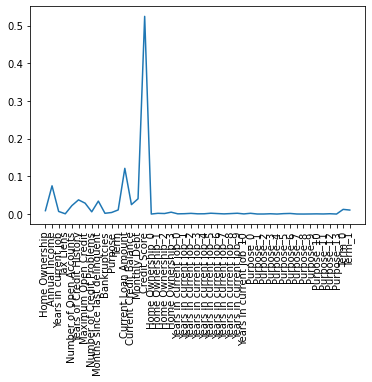

In [819]:
plt.plot(model_ac.feature_importances_)
plt.xticks(np.arange(X_train.shape[1]), X_train.columns.tolist(), rotation=90);
r2

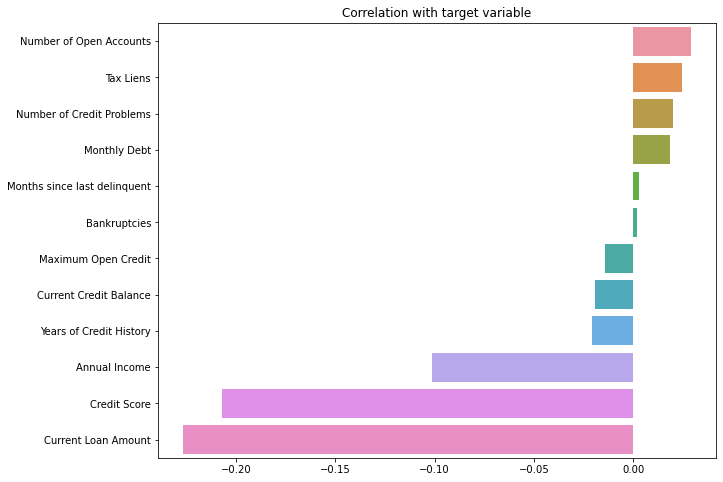

In [820]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = train.columns.drop(TARGET_NAME).tolist()
corr_with_target = train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

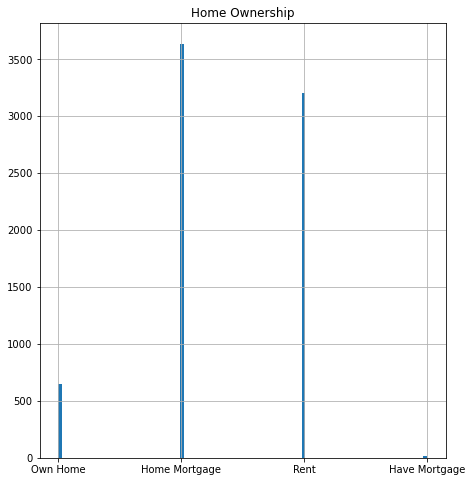

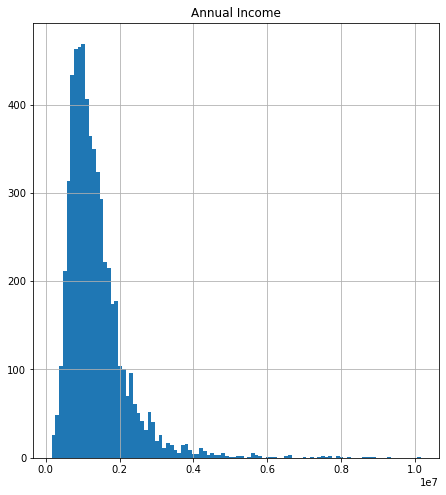

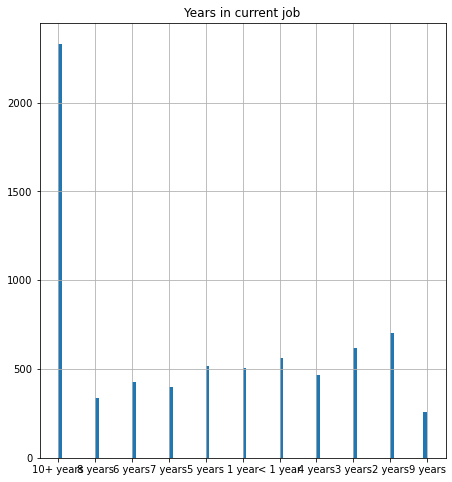

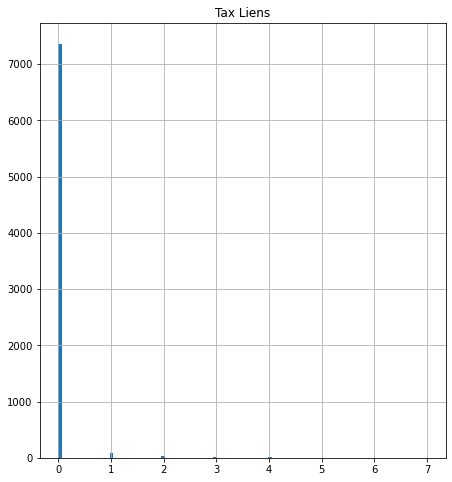

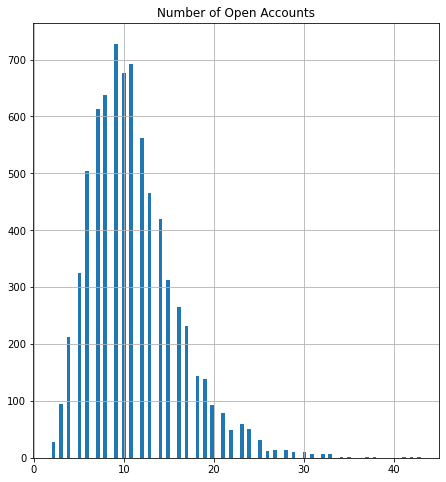

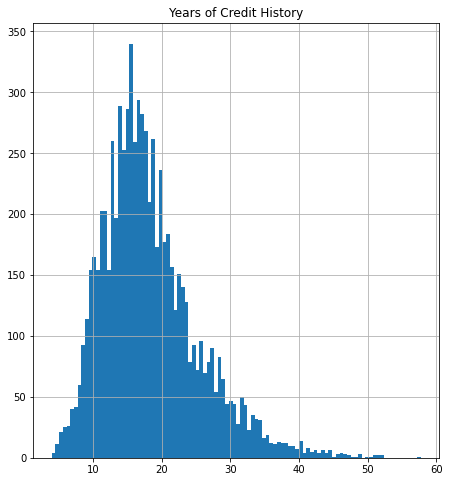

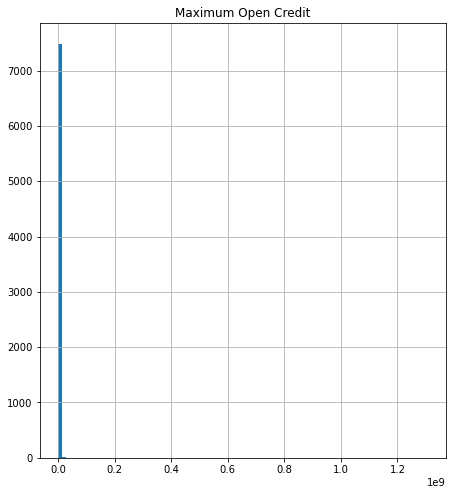

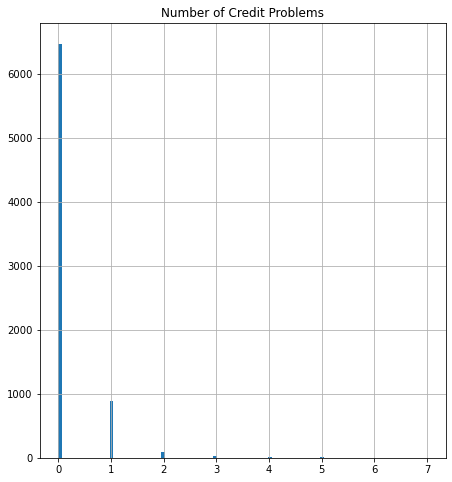

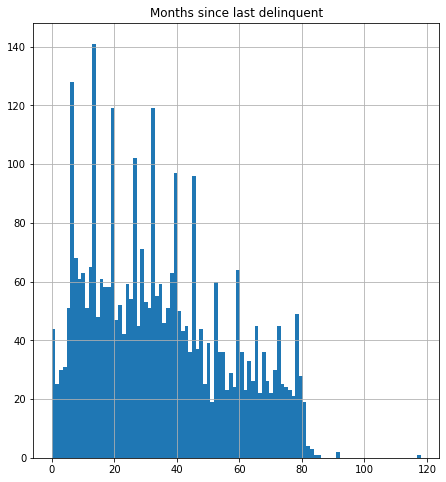

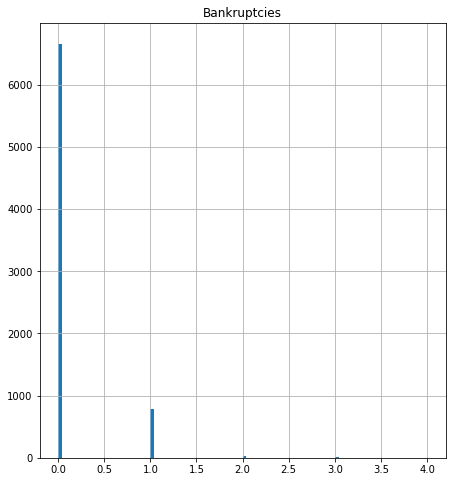

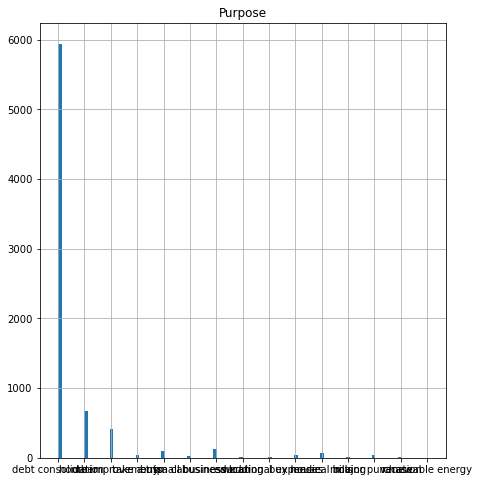

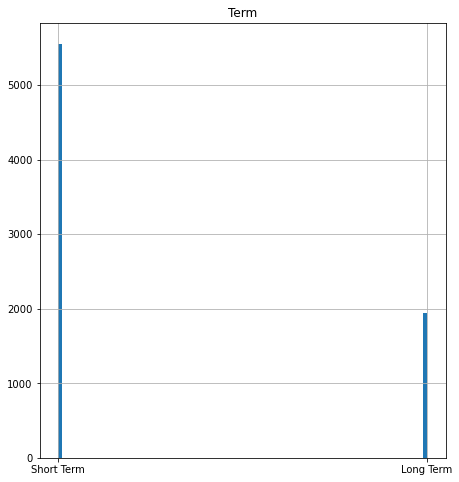

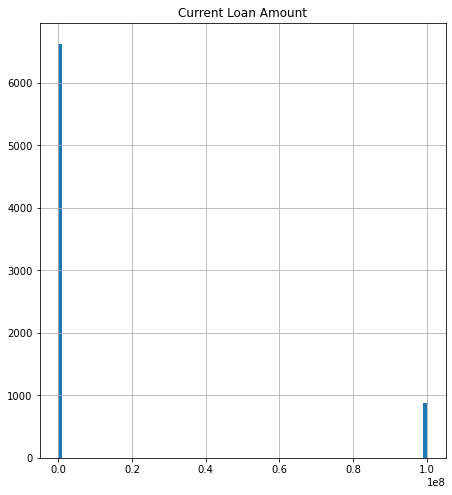

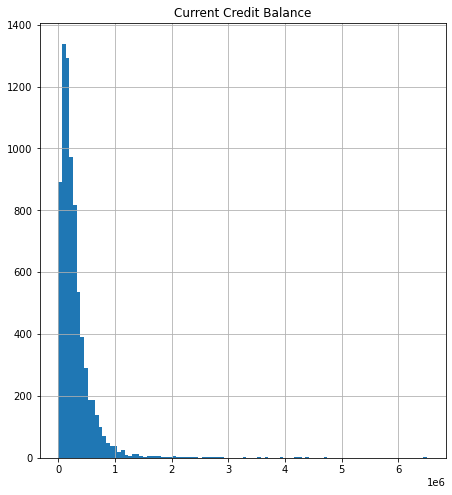

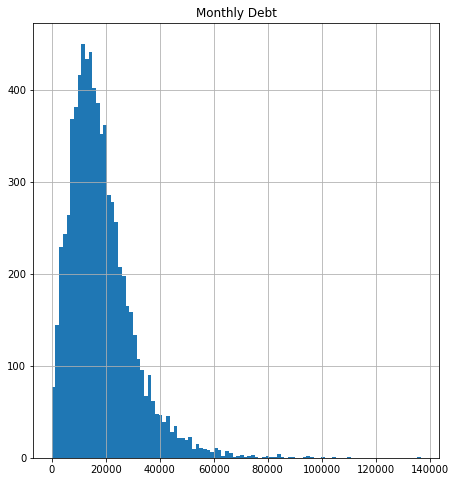

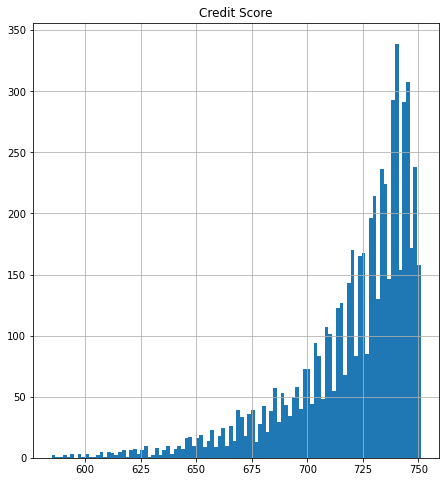

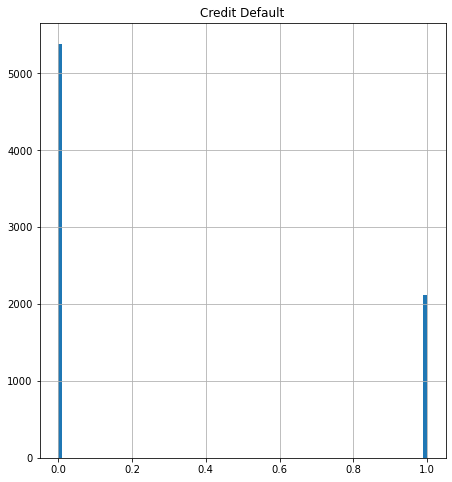

In [821]:
for name in train.columns:
    plt.figure(figsize= (16, 8))

    plt.subplot(122)
    temp = train[name]
    temp.hist(bins = 100)
    
    plt.title(str(name))
    plt.show()

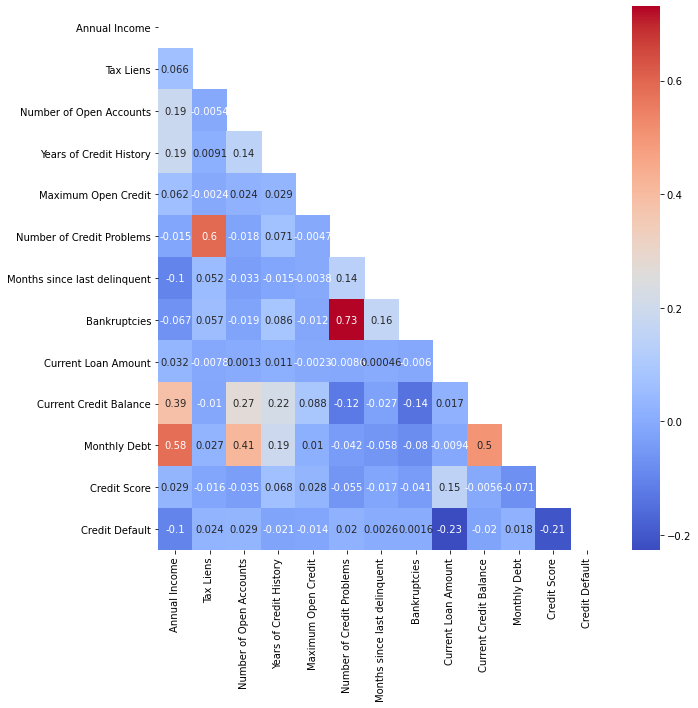

In [822]:
fig, ax = plt.subplots(figsize=(10,10))
matrix = np.triu(train.corr())
sns.heatmap(train.corr(), annot=True, cmap= 'coolwarm', mask=matrix, ax=ax)

Возможные корреляции
- Bankruptcies + Number of Credit Problems
- Monthly Debt + Annual Income
- Monthly Debt + Tax Liens
- Monthly Debt + Current Credit Balance
- Current Credit Balance + Annual Income

In [823]:
#xx = train['Current Credit Balance']
#yy = train['Annual Income'] / 5
xx = np.log(train['Number of Open Accounts'] / 0.6)
yy = np.log(train['Years of Credit History'])

#xx = train['Monthly Debt']
#yy = train['Current Credit Balance']

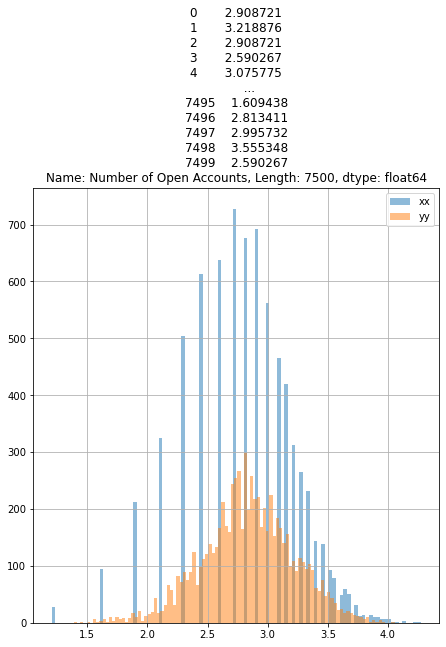

In [824]:
plt.figure(figsize= (16, 8))

plt.subplot(122)
(xx).hist(alpha=0.5, label='xx', bins = 100)
(yy).hist(alpha=0.5, label='yy', bins = 100)

plt.title(str(xx))
plt.legend()
plt.show()

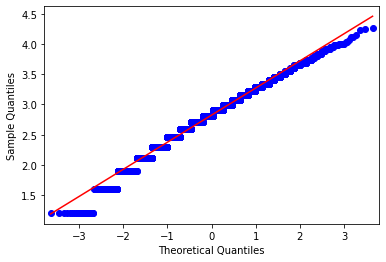

In [825]:
# q-q plot
qqplot(xx, line='s')
plt.show()

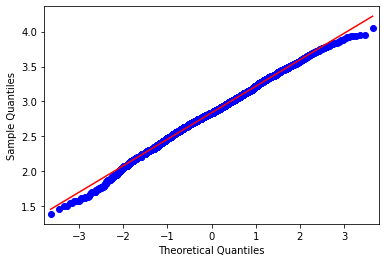

In [826]:
# q-q plot
qqplot(yy, line='s')
plt.show()

In [827]:
# Шапиро-Уилк
c,p = shapiro(xx)
print(c, p)

#D’Agostino’s K2 test
c,p = normaltest(xx)
print(p)

# Колмогоров-Смирнов
c,p = kstest(xx, 'norm')
print(p)

0.9871752858161926 1.6178159124689144e-25
1.5533507605018778e-39
0.0


logistic :  1.6178159124689144e-25 1.5533507605018778e-39 0.0


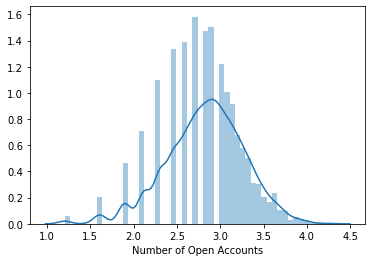

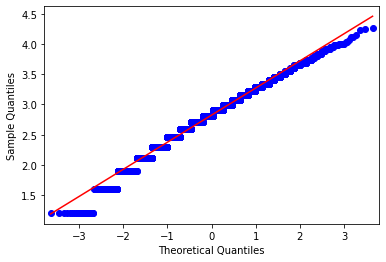

loggamma : 6.589366274845077e-10 2.7840158029163166e-08 0.0


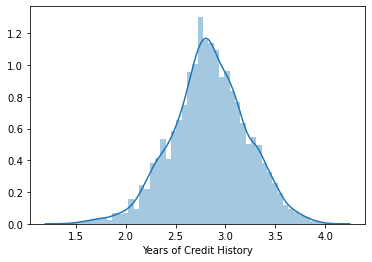

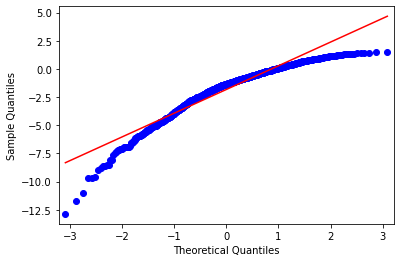

In [828]:
c = 0.5
r2 = loggamma.rvs(c, size=1000)
r1 = logistic.rvs(size=1000)

c,p11 = shapiro(xx)
c,p12 = normaltest(xx)
c,p13 = kstest(xx, 'norm')
print('logistic : ',p11,p12,p13)

sns.distplot(xx)
plt.show()
qqplot(xx, line='s')
plt.show()

c,p21 = shapiro(yy)
c,p22 = normaltest(yy)
c,p23 = kstest(yy, 'norm')
print('loggamma :',p21,p22,p23)


sns.distplot(yy)
plt.show()
qqplot(r2, line='s')
plt.show()

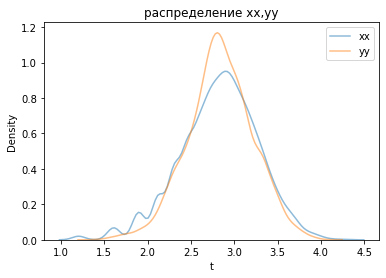

In [829]:
sns.kdeplot(xx,alpha=0.5,label='xx')
sns.kdeplot(yy,alpha=0.5,label='yy')
plt.xlabel('t')
plt.ylabel('Density')
plt.title('распределение xx,yy')
plt.show()

Приведенные график к нормальному распределению указывают на возможную зависимость. Необходимо проверить на шумы.

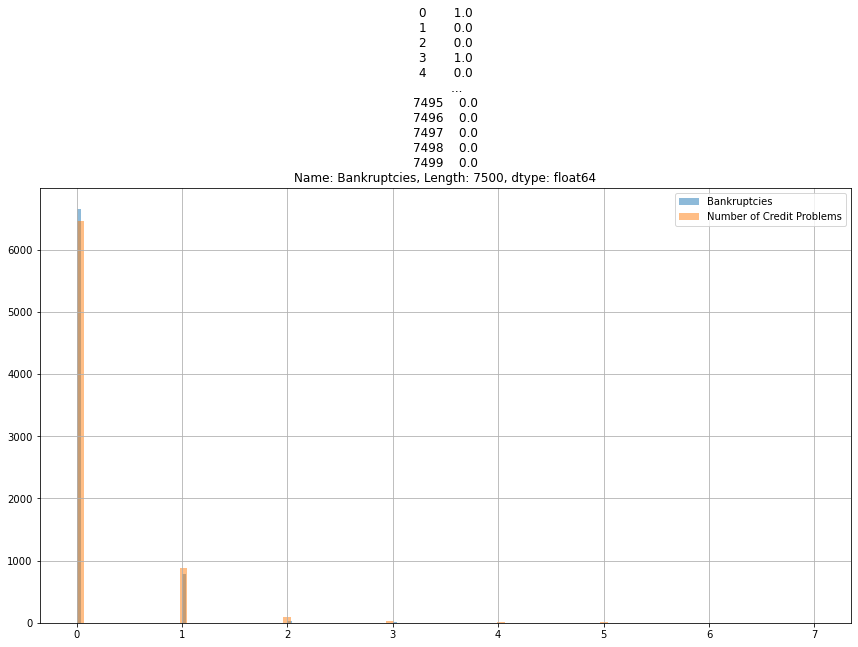

In [830]:
xx1 = (train['Bankruptcies'])
yy1 = (train['Number of Credit Problems'])
plt.figure(figsize= (32, 8))

plt.subplot(122)
(xx1).hist(alpha=0.5, label='Bankruptcies', bins = 100)
(yy1).hist(alpha=0.5, label='Number of Credit Problems', bins = 100)

plt.title(str(xx1))
plt.legend()
plt.show()

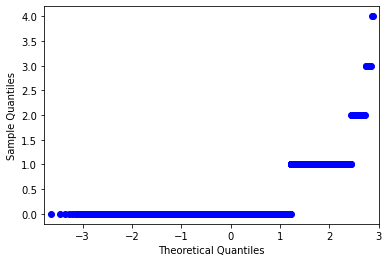

In [831]:
# q-q plot
qqplot(xx1, line='s')
plt.show()

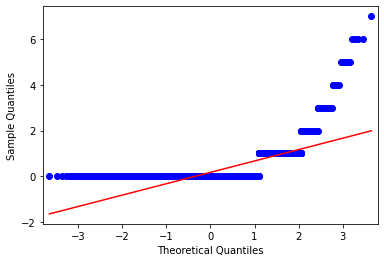

In [832]:
# q-q plot
qqplot(yy1, line='s')
plt.show()

Явное повторение.

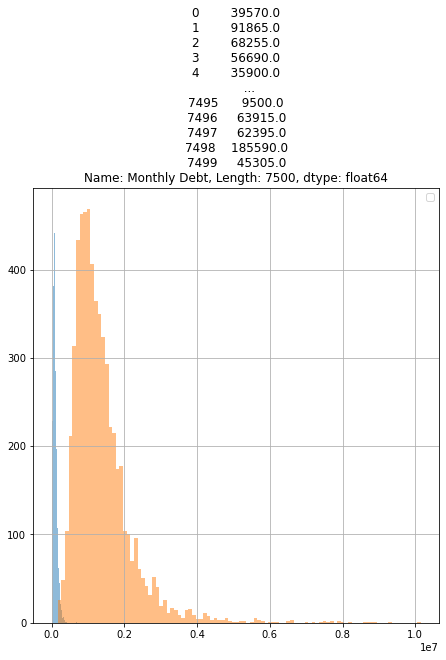

In [833]:
plt.figure(figsize= (16, 8))

xx2 = train['Monthly Debt']*5
yy2 = train['Annual Income']

plt.subplot(122)
xx2.hist(alpha=0.5, bins = 100)
yy2.hist(alpha=0.5, bins = 100)

plt.title(str(xx2))
plt.legend()
plt.show()

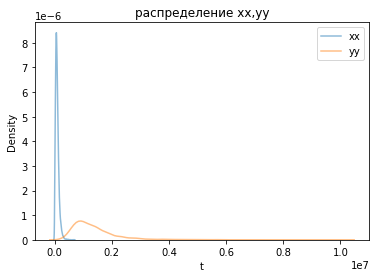

In [834]:
sns.kdeplot(xx2,alpha=0.5,label='xx')
sns.kdeplot(yy2,alpha=0.5,label='yy')
plt.xlabel('t')
plt.ylabel('Density')
plt.title('распределение xx,yy')
plt.show()

Возможно есть корреляция, но возможно ее нет

In [835]:
ks_2samp(xx,yy)

KstestResult(statistic=0.08586666666666666, pvalue=1.8086884001585272e-24)

In [836]:
ks_2samp(xx1,yy1)

KstestResult(statistic=0.025466666666666665, pvalue=0.01543391138164133)

In [837]:
ks_2samp(xx2,yy2)

KstestResult(statistic=0.9872, pvalue=0.0)

In [838]:
pca = PCA(n_components=2)
X= pca.fit_transform(train_probe.loc[:,['Bankruptcies', 'Number of Credit Problems','Monthly Debt', 'Annual Income', 'Tax Liens', 'Current Credit Balance']].values)

In [839]:
X

array([[  27603.72728353, -213299.19281616],
       [-434865.54857347, -116763.77369722],
       [ -61900.85370665,  -50263.84157641],
       ...,
       [1346774.98079871, -322242.24986853],
       [-209131.65636858,  -66271.43880953],
       [ 101273.59183271,  185466.51756591]])

In [840]:
train_probe['new_f1_pca']=X[:,0]
train_probe['new_f2_pca']=X[:,1]

In [841]:
train_probe

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Purpose_8,Purpose_9,Purpose_10,Purpose_11,Purpose_12,Purpose_13,Term_0,Term_1,new_f1_pca,new_f2_pca
6,1,1511108.0,1,0.0,9.0,20.3,388124.0,0.0,73.0,0.0,...,0,0,0,0,0,0,0,1,2.760373e+04,-213299.192816
7,3,1040060.0,1,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,...,0,1,0,0,0,0,0,1,-4.348655e+05,-116763.773697
18,1,1401744.0,2,0.0,9.0,29.0,387222.0,0.0,40.0,0.0,...,0,0,0,0,0,0,1,0,-6.190085e+04,-50263.841576
20,1,1651993.0,1,0.0,11.0,26.5,663894.0,0.0,44.0,0.0,...,0,0,0,0,0,0,1,0,1.927175e+05,-31341.020557
21,1,1047394.0,6,0.0,7.0,34.4,401104.0,0.0,45.0,0.0,...,0,0,0,0,0,0,0,1,-4.157821e+05,-23981.460556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,1,1394942.0,1,0.0,15.0,27.2,1441396.0,0.0,35.0,0.0,...,0,0,0,0,0,0,0,1,-3.156337e+04,242979.537395
7490,2,1368000.0,1,0.0,20.0,26.7,897842.0,0.0,69.0,0.0,...,0,0,0,0,0,0,0,1,-5.562024e+04,266836.140184
7491,1,2833185.0,6,0.0,18.0,21.3,280170.0,0.0,6.0,0.0,...,0,0,0,0,0,0,0,1,1.346775e+06,-322242.249869
7493,3,1257610.0,8,0.0,14.0,16.5,821480.0,0.0,58.0,0.0,...,0,0,0,0,0,0,1,0,-2.091317e+05,-66271.438810


In [842]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [843]:
def balance_df_by_target(df, target_name):
    print(target_name)
    print(type(df[target_name]))
    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [844]:
CAT_FEATURE_NAMES = [
    'Home Ownership_0',
    'Home Ownership_1',
    'Home Ownership_2',
    'Home Ownership_3',
    'Tax Liens', 
    'Number of Open Accounts', 
    'Number of Credit Problems', 
    'Months since last delinquent', 
    'Bankruptcies', 
    'Years in current job_0',
    'Years in current job_1',
    'Years in current job_2',
    'Years in current job_3',
    'Years in current job_4',
    'Years in current job_5',
    'Years in current job_6',
    'Years in current job_7',
    'Years in current job_8',
    'Years in current job_9',
    'Years in current job_10',
    'Purpose_0',
    'Purpose_1',
    'Purpose_2',
    'Purpose_3',
    'Purpose_4',
    'Purpose_5',
    'Purpose_6',
    'Purpose_7',
    'Purpose_8',
    'Purpose_9',
    'Purpose_10',
    'Purpose_11',
    'Purpose_12',
    'Purpose_13',
    'Term_0', 
    'Term_1']

In [845]:
TARGET_NAME = 'Credit Default'

In [846]:
SELECTED_FEATURE_NAMES = [a for a in list(train_probe) if a != TARGET_NAME]

In [847]:
NUM_FEATURE_NAMES = [a for a in SELECTED_FEATURE_NAMES if a not in CAT_FEATURE_NAMES]

### Приведение типов для модели CatBoost

In [848]:
list(train_probe)

['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default',
 'Home Ownership_0',
 'Home Ownership_1',
 'Home Ownership_2',
 'Home Ownership_3',
 'Years in current job_0',
 'Years in current job_1',
 'Years in current job_2',
 'Years in current job_3',
 'Years in current job_4',
 'Years in current job_5',
 'Years in current job_6',
 'Years in current job_7',
 'Years in current job_8',
 'Years in current job_9',
 'Years in current job_10',
 'Purpose_0',
 'Purpose_1',
 'Purpose_2',
 'Purpose_3',
 'Purpose_4',
 'Purpose_5',
 'Purpose_6',
 'Purpose_7',
 'Purpose_8',
 'Purpose_9',
 'Purpose_10',
 'Purpose_11',
 'Purpose_12',
 'Purpose_13',
 'Term_0',
 'Term_1',
 'new_f1_pca',
 'new_f2_pca']

In [849]:
for colname in CAT_FEATURE_NAMES:
    train_probe[colname] = pd.Categorical(train_probe[colname])
    
train_probe[CAT_FEATURE_NAMES].dtypes

Home Ownership_0                category
Home Ownership_1                category
Home Ownership_2                category
Home Ownership_3                category
Tax Liens                       category
Number of Open Accounts         category
Number of Credit Problems       category
Months since last delinquent    category
Bankruptcies                    category
Years in current job_0          category
Years in current job_1          category
Years in current job_2          category
Years in current job_3          category
Years in current job_4          category
Years in current job_5          category
Years in current job_6          category
Years in current job_7          category
Years in current job_8          category
Years in current job_9          category
Years in current job_10         category
Purpose_0                       category
Purpose_1                       category
Purpose_2                       category
Purpose_3                       category
Purpose_4       

### Нормализация данных<a class="anchor" id="normalization"></a>

In [850]:
scaler = StandardScaler()

df_norm = train_probe.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

df = df_norm.copy()

**Сохранение модели для нормализации данных**

In [851]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

### Разбиение на train и test<a class="anchor" id="train_and_test"></a>

In [852]:
X = train_probe[SELECTED_FEATURE_NAMES]
y = train_probe[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

In [853]:
X_train.shape

(1809, 49)

In [854]:
X_test.shape

(776, 49)

### Балансировка целевой переменной<a class="anchor" id="target_balancing"></a>

In [855]:
y_train

2522    0
7147    0
5162    0
7100    0
7055    0
       ..
7067    0
168     0
2322    0
5393    1
3619    0
Name: Credit Default, Length: 1809, dtype: int64

In [856]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)

In [857]:
df_for_balancing[TARGET_NAME]

2522    0
7147    0
5162    0
7100    0
7055    0
       ..
7067    0
168     0
2322    0
5393    1
3619    0
Name: Credit Default, Length: 1809, dtype: int64

In [858]:
X_train

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Purpose_8,Purpose_9,Purpose_10,Purpose_11,Purpose_12,Purpose_13,Term_0,Term_1,new_f1_pca,new_f2_pca
2522,1,1916682.0,10,0.0,15.0,20.7,865700.0,1.0,47.0,0.0,...,0,0,0,0,0,0,0,1,479262.106001,123129.882604
7147,1,1580363.0,6,0.0,7.0,19.6,556644.0,0.0,17.0,0.0,...,0,0,0,0,0,0,0,1,143179.025401,147065.015241
5162,1,911867.0,6,0.0,10.0,14.0,457204.0,0.0,66.0,0.0,...,0,0,0,0,0,0,0,1,-546001.444820,25748.615164
7100,2,1161660.0,6,0.0,20.0,22.0,782562.0,0.0,81.0,0.0,...,0,0,0,0,0,0,0,1,-252089.276742,357677.994830
7055,1,1458915.0,2,0.0,14.0,27.3,1579248.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,1,11081.220019,70938.250799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,1,2365975.0,1,0.0,21.0,14.0,1076746.0,0.0,59.0,0.0,...,0,0,0,0,0,0,0,1,924419.768568,62657.366340
168,1,2379522.0,2,0.0,23.0,17.8,1267530.0,0.0,37.0,0.0,...,0,0,0,0,0,0,0,1,988457.743115,459510.812925
2322,1,475817.0,10,0.0,6.0,20.9,328482.0,0.0,6.0,0.0,...,0,0,0,0,0,0,0,1,-972839.540483,126427.788362
5393,3,1008938.0,3,0.0,10.0,12.4,319110.0,0.0,6.0,0.0,...,0,0,0,0,0,0,0,1,-457754.054010,-49934.373241


In [859]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

Credit Default
<class 'pandas.core.series.Series'>


0    1320
1     978
Name: Credit Default, dtype: int64

In [860]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

### Сохранение обучающего и тестового датасетов<a class="anchor" id="train_test_saving"></a> 

In [861]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [862]:
df.to_csv(TRAIN_FULL_PATH, index=False, encoding='utf-8')
train.to_csv(TRAIN_PART_PATH, index=False, encoding='utf-8')
test.to_csv(TEST_PART_PATH, index=False, encoding='utf-8')

### Построение и оценка базовых моделей<a class="anchor" id="baseline_modeling"></a> 

**Логистическая регрессия**

In [863]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.68      0.88      0.76      1320
           1       0.72      0.43      0.54       978

    accuracy                           0.69      2298
   macro avg       0.70      0.65      0.65      2298
weighted avg       0.70      0.69      0.67      2298

TEST

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       586
           1       0.50      0.36      0.42       190

    accuracy                           0.75       776
   macro avg       0.65      0.62      0.63       776
weighted avg       0.73      0.75      0.74       776

CONFUSION MATRIX

col_0             0   1
Credit Default         
0               516  70
1               121  69


**k ближайших соседей**

In [864]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1320
           1       0.74      0.71      0.72       978

    accuracy                           0.77      2298
   macro avg       0.76      0.76      0.76      2298
weighted avg       0.77      0.77      0.77      2298

TEST

              precision    recall  f1-score   support

           0       0.78      0.73      0.76       586
           1       0.30      0.35      0.32       190

    accuracy                           0.64       776
   macro avg       0.54      0.54      0.54       776
weighted avg       0.66      0.64      0.65       776

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               430  156
1               123   67


**Бустинговые алгоритмы**

*XGBoost*

In [865]:
X_train

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Purpose_8,Purpose_9,Purpose_10,Purpose_11,Purpose_12,Purpose_13,Term_0,Term_1,new_f1_pca,new_f2_pca
2216,1,1496744.0,1,0.0,7.0,19.8,411708.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,1.692750e+04,-184210.997629
675,3,422389.0,9,0.0,3.0,15.4,31108.0,0.0,22.0,0.0,...,0,0,0,0,0,0,0,1,-1.056274e+06,-106451.978653
520,1,1357113.0,3,0.0,9.0,19.4,2251040.0,0.0,2.0,0.0,...,0,1,0,0,0,0,1,0,-1.299070e+05,-231584.276682
1902,1,1910678.0,1,0.0,13.0,19.4,351208.0,0.0,39.0,0.0,...,0,0,0,0,0,0,0,1,4.440557e+05,-106342.089748
2017,1,785232.0,3,0.0,8.0,31.6,318494.0,1.0,41.0,1.0,...,0,0,0,0,0,0,0,1,-6.855427e+05,-67732.370238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,1,1993765.0,0,0.0,19.0,20.0,485562.0,0.0,20.0,0.0,...,0,0,0,0,0,0,1,0,5.410179e+05,-2185.753004
2173,3,730835.0,2,0.0,6.0,19.4,63184.0,0.0,11.0,0.0,...,0,0,0,0,0,1,0,1,-7.492016e+05,-137357.269298
304,1,920018.0,9,0.0,12.0,23.6,153252.0,2.0,55.0,2.0,...,0,0,0,0,0,0,0,1,-5.554931e+05,-113600.900848
1046,3,899688.0,1,0.0,14.0,16.8,791076.0,0.0,51.0,0.0,...,0,0,0,0,0,0,0,1,-5.646173e+05,-23523.386332


In [866]:
xgbX_train = X_train.copy()
xgbX_test = X_test.copy()

for colname in CAT_FEATURE_NAMES:
    xgbX_train[colname] = xgbX_train[colname].astype('int') 
    xgbX_test[colname] = xgbX_test[colname].astype('int') 

In [867]:
model_xgb = xgb.XGBClassifier(random_state=21)
model_xgb.fit(xgbX_train, y_train)

y_train_pred = model_xgb.predict(xgbX_train)
y_test_pred = model_xgb.predict(xgbX_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1320
           1       1.00      1.00      1.00       978

    accuracy                           1.00      2298
   macro avg       1.00      1.00      1.00      2298
weighted avg       1.00      1.00      1.00      2298

TEST

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       586
           1       0.56      0.42      0.48       190

    accuracy                           0.78       776
   macro avg       0.69      0.66      0.67       776
weighted avg       0.76      0.78      0.77       776

CONFUSION MATRIX

col_0             0   1
Credit Default         
0               525  61
1               111  79


*LightGBM*

In [868]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1320
           1       1.00      1.00      1.00       978

    accuracy                           1.00      2298
   macro avg       1.00      1.00      1.00      2298
weighted avg       1.00      1.00      1.00      2298

TEST

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       586
           1       0.56      0.40      0.47       190

    accuracy                           0.78       776
   macro avg       0.69      0.65      0.66       776
weighted avg       0.76      0.78      0.76       776

CONFUSION MATRIX

col_0             0   1
Credit Default         
0               526  60
1               114  76


*CatBoost*

In [869]:
X_train['Tax Liens'].dtypes

CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ordered=False)

In [870]:
cat_features=[pos for (pos, v) in enumerate(SELECTED_FEATURE_NAMES) if v in CAT_FEATURE_NAMES]
print(cat_features)

[3, 4, 7, 8, 9, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]


In [871]:
X_train

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Purpose_8,Purpose_9,Purpose_10,Purpose_11,Purpose_12,Purpose_13,Term_0,Term_1,new_f1_pca,new_f2_pca
2216,1,1496744.0,1,0.0,7.0,19.8,411708.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,1.692750e+04,-184210.997629
675,3,422389.0,9,0.0,3.0,15.4,31108.0,0.0,22.0,0.0,...,0,0,0,0,0,0,0,1,-1.056274e+06,-106451.978653
520,1,1357113.0,3,0.0,9.0,19.4,2251040.0,0.0,2.0,0.0,...,0,1,0,0,0,0,1,0,-1.299070e+05,-231584.276682
1902,1,1910678.0,1,0.0,13.0,19.4,351208.0,0.0,39.0,0.0,...,0,0,0,0,0,0,0,1,4.440557e+05,-106342.089748
2017,1,785232.0,3,0.0,8.0,31.6,318494.0,1.0,41.0,1.0,...,0,0,0,0,0,0,0,1,-6.855427e+05,-67732.370238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,1,1993765.0,0,0.0,19.0,20.0,485562.0,0.0,20.0,0.0,...,0,0,0,0,0,0,1,0,5.410179e+05,-2185.753004
2173,3,730835.0,2,0.0,6.0,19.4,63184.0,0.0,11.0,0.0,...,0,0,0,0,0,1,0,1,-7.492016e+05,-137357.269298
304,1,920018.0,9,0.0,12.0,23.6,153252.0,2.0,55.0,2.0,...,0,0,0,0,0,0,0,1,-5.554931e+05,-113600.900848
1046,3,899688.0,1,0.0,14.0,16.8,791076.0,0.0,51.0,0.0,...,0,0,0,0,0,0,0,1,-5.646173e+05,-23523.386332


In [872]:
cbX_train = X_train.copy()
cbX_test = X_test.copy()

for colname in CAT_FEATURE_NAMES:
    cbX_train[colname] = cbX_train[colname].astype('int') 
    cbX_test[colname] = cbX_test[colname].astype('int') 
    cbX_train[colname] = pd.Categorical(cbX_train[colname])
    cbX_test[colname] = pd.Categorical(cbX_test[colname])
    
cbX_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2298 entries, 2216 to 610
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Home Ownership                2298 non-null   int64   
 1   Annual Income                 2298 non-null   float64 
 2   Years in current job          2298 non-null   int64   
 3   Tax Liens                     2298 non-null   category
 4   Number of Open Accounts       2298 non-null   category
 5   Years of Credit History       2298 non-null   float64 
 6   Maximum Open Credit           2298 non-null   float64 
 7   Number of Credit Problems     2298 non-null   category
 8   Months since last delinquent  2298 non-null   category
 9   Bankruptcies                  2298 non-null   category
 10  Purpose                       2298 non-null   int64   
 11  Term                          2298 non-null   int64   
 12  Current Loan Amount           2298 non-null   

In [873]:
model_catb = catb.CatBoostClassifier(iterations=142, silent=True, cat_features=CAT_FEATURE_NAMES)
model_catb.fit(cbX_train, y_train,
          verbose=False)

y_train_pred = model_catb.predict(cbX_train)
y_test_pred = model_catb.predict(cbX_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1320
           1       0.96      0.89      0.92       978

    accuracy                           0.94      2298
   macro avg       0.94      0.93      0.93      2298
weighted avg       0.94      0.94      0.94      2298

TEST

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       586
           1       0.54      0.42      0.47       190

    accuracy                           0.77       776
   macro avg       0.68      0.65      0.66       776
weighted avg       0.76      0.77      0.76       776

CONFUSION MATRIX

col_0             0   1
Credit Default         
0               518  68
1               110  80


### Выбор лучшей модели и подбор гиперпараметров<a class="anchor" id="tuning_best_model"></a> 

In [874]:
model_catb_ = catb.CatBoostClassifier(class_weights=[1, 3.5], random_state=21, cat_features=CAT_FEATURE_NAMES )
#model_catb = catb.CatBoostClassifier(class_weights=[1, 3.5], silent=True, random_state=21)
model_catb.fit(cbX_train, y_train,
          verbose=False)

y_train_pred = model_catb.predict(cbX_train)
y_test_pred = model_catb.predict(cbX_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1320
           1       0.96      0.89      0.92       978

    accuracy                           0.94      2298
   macro avg       0.94      0.93      0.93      2298
weighted avg       0.94      0.94      0.94      2298

TEST

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       586
           1       0.54      0.42      0.47       190

    accuracy                           0.77       776
   macro avg       0.68      0.65      0.66       776
weighted avg       0.76      0.77      0.76       776

CONFUSION MATRIX

col_0             0   1
Credit Default         
0               518  68
1               110  80


**Подбор гиперпараметров**

In [875]:
params = {'n_estimators':[50, 100, 200, 500, 700, 1000, 1200, 1500],
          'max_depth':[3, 5, 7]}

In [876]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [877]:
params

{'n_estimators': [50, 100, 200, 500, 700, 1000, 1200, 1500],
 'max_depth': [3, 5, 7]}

In [878]:
%%time

rs = RandomizedSearchCV(model_xgb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(xgbX_train, y_train)

CPU times: user 3.15 s, sys: 189 ms, total: 3.34 s
Wall time: 39.6 s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1, random_state=21,
                                           reg_alpha=0, reg_l

In [879]:
rs.best_params_

{'n_estimators': 200, 'max_depth': 7}

In [880]:
rs.best_score_

0.8261511545599053

In [881]:
from catboost import Pool,cv

In [882]:
c_dataset = Pool(data=cbX_train,
                  label=y_train,
                  cat_features=CAT_FEATURE_NAMES)


params = {"iterations": 150,
          
          "max_depth":3,
          "eval_metric":"F1",
          "l2_leaf_reg":10.0,
          "loss_function": "Logloss",
          "colsample_bylevel":0.5,
          "verbose": False}
scores = cv(c_dataset,
            params,
            fold_count=3, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [883]:

params = {"iterations": 150,
          "max_depth":10,
          "class_weights":[1,3.5],
          "eval_metric":"F1",
          "l2_leaf_reg":10.0,
          "loss_function": "Logloss",
          "colsample_bylevel":0.5,
          #"ignored_features":ind_to_del,
          "verbose": False}
scores = cv(c_dataset,
            params,
            fold_count=3, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [884]:
catb_model_grid = catb.CatBoostClassifier(cat_features=CAT_FEATURE_NAMES,iterations=150,eval_metric="F1",loss_function="Logloss",colsample_bylevel=0.5,
          class_weights=[1,3.5],verbose=False)
grid = {'depth': [2,3,4, 5, 10],
        'l2_leaf_reg': [10, 3]}
grid_search_result = catb_model_grid.grid_search(grid, 
                                       X=cbX_train, 
                                       y=y_train, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8768532526
bestIteration = 140

0:	loss: 0.8768533	best: 0.8768533 (0)	total: 209ms	remaining: 1.88s

bestTest = 0.8771084337
bestIteration = 113

1:	loss: 0.8771084	best: 0.8771084 (1)	total: 406ms	remaining: 1.63s

bestTest = 0.8781664656
bestIteration = 101

2:	loss: 0.8781665	best: 0.8781665 (2)	total: 657ms	remaining: 1.53s

bestTest = 0.8834951456
bestIteration = 140

3:	loss: 0.8834951	best: 0.8834951 (3)	total: 818ms	remaining: 1.23s

bestTest = 0.8834951456
bestIteration = 146

4:	loss: 0.8834951	best: 0.8834951 (3)	total: 1s	remaining: 1s

bestTest = 0.8829593693
bestIteration = 142

5:	loss: 0.8829594	best: 0.8834951 (3)	total: 1.28s	remaining: 857ms

bestTest = 0.8811188811
bestIteration = 147

6:	loss: 0.8811189	best: 0.8834951 (3)	total: 1.54s	remaining: 662ms

bestTest = 0.8867235079
bestIteration = 139

7:	loss: 0.8867235	best: 0.8867235 (7)	total: 1.79s	remaining: 448ms

bestTest = 0.8879310345
bestIteration = 118

8:	loss: 0.8879310	best: 0.8879310 (8)	t

In [885]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif,chi2
from sklearn.feature_selection import SelectFromModel, SelectKBest

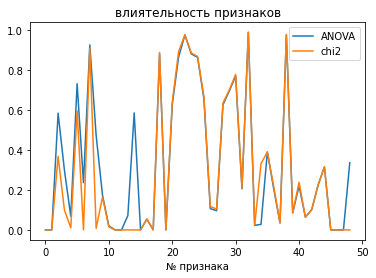

In [886]:
rez_c = chi2(np.abs(cbX_train),y_train)
rez_f = f_classif(cbX_train,y_train)

plt.plot(rez_f[1], label= 'ANOVA')
plt.plot(rez_c[1],label='chi2')
plt.title('влиятельность признаков')
plt.xlabel('№ признака')
plt.legend()
plt.show()

<BarContainer object of 49 artists>

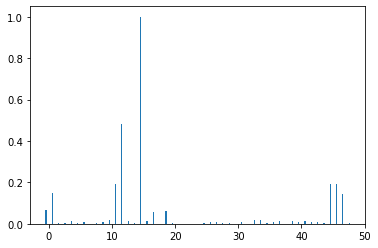

In [887]:
selector = SelectKBest(f_classif, k=4)
selector.fit(cbX_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(np.arange(cbX_train.shape[-1]) - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')

In [888]:
ind_select =  np.where(selector.pvalues_>0.01)[0]
print(cbX_train.columns[ind_select])

Index(['Years in current job', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Purpose', 'Current Credit Balance', 'Monthly Debt',
       'Home Ownership_0', 'Home Ownership_2', 'Years in current job_0',
       'Years in current job_1', 'Years in current job_2',
       'Years in current job_3', 'Years in current job_4',
       'Years in current job_5', 'Years in current job_6',
       'Years in current job_7', 'Years in current job_8',
       'Years in current job_9', 'Years in current job_10', 'Purpose_0',
       'Purpose_1', 'Purpose_2', 'Purpose_3', 'Purpose_4', 'Purpose_5',
       'Purpose_6', 'Purpose_7', 'Purpose_8', 'Purpose_9', 'Purpose_10',
       'Purpose_11', 'Purpose_12', 'Purpose_13', 'new_f2_pca'],
      dtype='object')


In [889]:
# определение списка лучших признаков по модели
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

In [890]:
catb_m = catb.CatBoostClassifier(iterations=150, silent=True, class_weights=[1,3.5], eval_metric="F1",loss_function = "Logloss", colsample_bylevel=0.5, cat_features=CAT_FEATURE_NAMES, depth=10, l2_leaf_reg=10)

catb_m.fit(cbX_train, y_train)

y_train_pred = catb_m.predict(cbX_train)
y_test_pred = catb_m.predict(cbX_test)
print('ошибка cat = ',np.mean(np.abs(y_test_pred-y_test.astype(int)))*100,'%')
get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

ошибка cat =  50.25773195876289 %
TRAIN

              precision    recall  f1-score   support

           0       1.00      0.41      0.58      1320
           1       0.56      1.00      0.71       978

    accuracy                           0.66      2298
   macro avg       0.78      0.70      0.65      2298
weighted avg       0.81      0.66      0.64      2298

TEST

              precision    recall  f1-score   support

           0       0.93      0.36      0.52       586
           1       0.32      0.92      0.47       190

    accuracy                           0.50       776
   macro avg       0.63      0.64      0.50       776
weighted avg       0.78      0.50      0.51       776

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               211  375
1                15  175


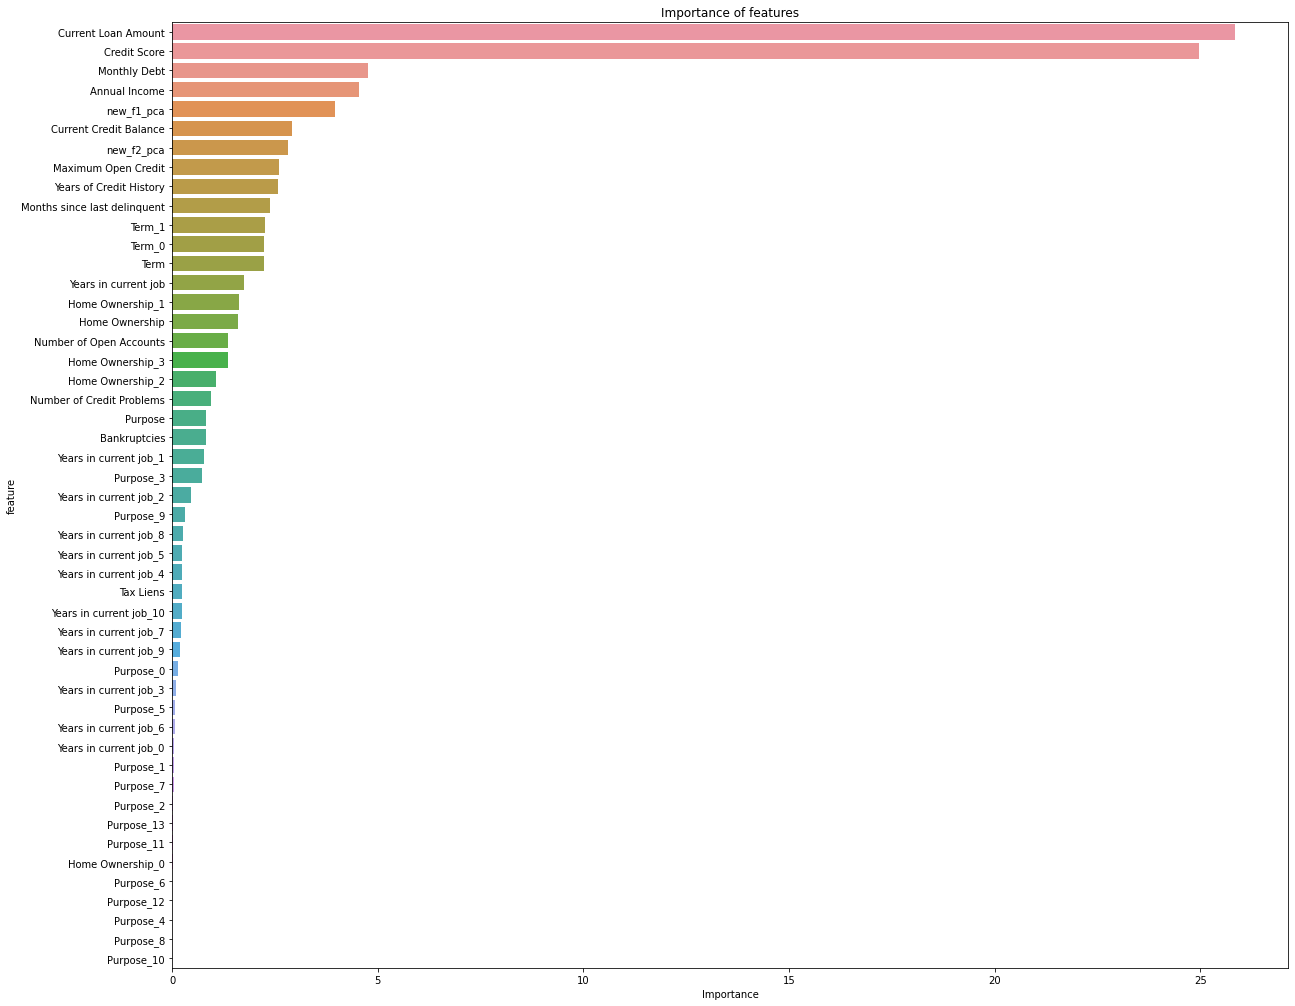

['Current Loan Amount', 'Credit Score', 'Monthly Debt', 'Annual Income', 'new_f1_pca', 'Current Credit Balance', 'new_f2_pca', 'Maximum Open Credit', 'Years of Credit History', 'Months since last delinquent', 'Term_1', 'Term_0', 'Term', 'Years in current job', 'Home Ownership_1']


In [891]:
important_features_top = show_feature_importances(cbX_train.columns, catb_m.feature_importances_, get_top=15)
print(important_features_top)

**Обучение и оценка финальной модели**

In [905]:
%%time
ind_to_del = [pos for (pos, v) in enumerate(list(cbX_train)) if pos not in ind_select]
#ignored_features=ind_to_del,

final_model = catb.CatBoostClassifier(iterations=140, silent=True, class_weights=[1,3.5], eval_metric="F1",loss_function = "Logloss", colsample_bylevel=0.5, cat_features=CAT_FEATURE_NAMES, depth=10, l2_leaf_reg=10)
final_model.fit(cbX_train, y_train)

y_train_pred = final_model.predict(cbX_train)
y_test_pred = final_model.predict(cbX_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       1.00      0.38      0.55      1320
           1       0.55      1.00      0.71       978

    accuracy                           0.65      2298
   macro avg       0.77      0.69      0.63      2298
weighted avg       0.81      0.65      0.62      2298

TEST

              precision    recall  f1-score   support

           0       0.95      0.35      0.51       586
           1       0.32      0.94      0.48       190

    accuracy                           0.50       776
   macro avg       0.63      0.65      0.50       776
weighted avg       0.79      0.50      0.51       776

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               207  379
1                12  178
CPU times: user 3.87 s, sys: 222 ms, total: 4.1 s
Wall time: 930 ms


In [893]:
df_train = pd.concat([cbX_train, y_train], axis=1)
df_train = pd.concat([df_train, pd.Series(data=y_train_pred, index=y_train.index, name="Pred")], axis=1)
df_train.loc[df_train['Credit Default'] != df_train['Pred']].describe()

,Home Ownership,Annual Income,Years in current job,Years of Credit History,Maximum Open Credit,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,new_f1_pca,new_f2_pca,Credit Default,Pred
count,784.000000,7.840000e+02,784.000000,784.000000,7.840000e+02,784.000000,784.000000,784.000000,7.840000e+02,784.000000,784.000000,7.840000e+02,7.840000e+02,784.0,784.0
mean,1.954082,1.218753e+06,3.528061,19.052806,5.157775e+05,3.691327,0.723214,289274.183673,2.392756e+05,17682.575255,716.270408,-2.387148e+05,9.791087e+03,0.0,1.0
std,0.959158,5.136153e+05,3.115770,6.796949,4.400195e+05,2.006790,0.447695,166907.927068,2.482890e+05,9806.216373,26.353784,5.260629e+05,2.207790e+05,0.0,0.0
min,0.000000,1.645970e+05,0.000000,4.800000,0.000000e+00,0.000000,0.000000,21736.000000,0.000000e+00,0.000000,598.000000,-1.298374e+06,-3.819490e+05,0.0,1.0
25%,1.000000,8.622342e+05,1.000000,14.300000,2.423465e+05,3.000000,0.000000,168399.000000,9.687625e+04,10395.000000,703.000000,-6.034673e+05,-1.123605e+05,0.0,1.0
50%,2.000000,1.136428e+06,2.000000,17.900000,3.973530e+05,3.000000,1.000000,257983.000000,1.720830e+05,16653.500000,722.000000,-3.252034e+05,-3.752799e+04,0.0,1.0
75%,3.000000,1.482337e+06,6.000000,22.600000,6.612540e+05,3.000000,1.000000,382409.500000,3.084602e+05,22974.750000,736.000000,1.729740e+04,7.936014e+04,0.0,1.0
max,3.000000,4.080934e+06,10.000000,48.300000,5.109676e+06,13.000000,1.000000,781440.000000,3.927471e+06,61551.000000,751.000000,2.664790e+06,3.419418e+06,0.0,1.0


In [894]:
df_train.loc[df_train['Credit Default'] == df_train['Pred']].describe()

,Home Ownership,Annual Income,Years in current job,Years of Credit History,Maximum Open Credit,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,new_f1_pca,new_f2_pca,Credit Default,Pred
count,1514.000000,1.514000e+03,1514.000000,1514.000000,1.514000e+03,1514.000000,1514.000000,1.514000e+03,1.514000e+03,1514.000000,1514.000000,1.514000e+03,1.514000e+03,1514.000000,1514.000000
mean,1.896962,1.479228e+06,3.536988,19.165192,8.789294e+05,3.660502,0.690885,2.446086e+06,2.646477e+05,19389.028402,1799.200132,2.288853e+04,2.204598e+03,0.645971,0.645971
std,0.955011,8.608896e+05,3.078230,6.714304,9.818278e+06,1.994291,0.462281,4.921676e+06,2.881505e+05,11769.000944,2408.996813,8.679427e+05,2.662406e+05,0.478376,0.478376
min,0.000000,2.876790e+05,0.000000,5.000000,0.000000e+00,0.000000,0.000000,2.171400e+04,0.000000e+00,0.000000,588.000000,-1.175391e+06,-8.285875e+05,0.000000,0.000000
25%,1.000000,9.140900e+05,1.000000,15.000000,2.524280e+05,3.000000,0.000000,2.148960e+05,1.061720e+05,11498.500000,707.000000,-5.538107e+05,-1.312717e+05,0.000000,0.000000
50%,1.000000,1.287098e+06,2.000000,17.700000,4.248200e+05,3.000000,1.000000,3.349390e+05,1.927455e+05,17103.500000,730.500000,-1.743626e+05,-4.243911e+04,1.000000,1.000000
75%,3.000000,1.803233e+06,6.000000,22.700000,7.258515e+05,3.000000,1.000000,6.078215e+05,3.151958e+05,24671.750000,745.000000,3.579839e+05,7.094659e+04,1.000000,1.000000
max,3.000000,8.633790e+06,10.000000,48.000000,3.800523e+08,13.000000,1.000000,1.388821e+07,3.271629e+06,93640.000000,7500.000000,7.183461e+06,2.822540e+06,1.000000,1.000000


In [895]:
df_test = pd.concat([cbX_test, y_test], axis=1)
df_test = pd.concat([df_test, pd.Series(data=y_test_pred, index=y_test.index, name="Pred")], axis=1)
df_test.loc[df_test['Credit Default'] != df_test['Pred']].describe()

,Home Ownership,Annual Income,Years in current job,Years of Credit History,Maximum Open Credit,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,new_f1_pca,new_f2_pca,Credit Default,Pred
count,390.000000,3.900000e+02,390.000000,390.000000,3.900000e+02,390.000000,390.000000,390.000000,3.900000e+02,390.000000,390.000000,3.900000e+02,3.900000e+02,390.000000,390.000000
mean,1.874359,1.327132e+06,3.400000,19.182821,5.719035e+05,3.633333,0.710256,303066.246154,2.551966e+05,18877.758974,717.217949,-1.291882e+05,1.196056e+04,0.038462,0.961538
std,0.946979,6.438678e+05,2.983071,6.624279,5.972728e+05,1.890693,0.454226,170156.276010,2.495443e+05,10771.134347,26.692405,6.509364e+05,2.305919e+05,0.192555,0.192555
min,1.000000,2.879640e+05,0.000000,6.600000,0.000000e+00,0.000000,0.000000,22220.000000,0.000000e+00,390.000000,610.000000,-1.191500e+06,-3.817073e+05,0.000000,0.000000
25%,1.000000,8.643622e+05,1.000000,14.425000,2.720905e+05,3.000000,0.000000,175906.500000,1.053882e+05,11176.500000,703.000000,-5.886637e+05,-1.131248e+05,0.000000,1.000000
50%,1.000000,1.171626e+06,2.000000,18.000000,4.423980e+05,3.000000,1.000000,270292.000000,1.860290e+05,17387.500000,724.000000,-2.553084e+05,-3.266000e+04,0.000000,1.000000
75%,3.000000,1.587374e+06,5.750000,22.775000,6.885505e+05,3.000000,1.000000,404079.500000,3.155948e+05,24265.750000,737.000000,1.466919e+05,7.696104e+04,0.000000,1.000000
max,3.000000,4.737175e+06,10.000000,50.600000,6.230994e+06,12.000000,1.000000,784938.000000,2.611835e+06,70268.000000,751.000000,3.306745e+06,2.314409e+06,1.000000,1.000000


In [896]:
df_test.loc[df_test['Credit Default'] == df_test['Pred']].describe()

,Home Ownership,Annual Income,Years in current job,Years of Credit History,Maximum Open Credit,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,new_f1_pca,new_f2_pca,Credit Default,Pred
count,386.000000,3.860000e+02,386.000000,386.00000,3.860000e+02,386.000000,386.000000,3.860000e+02,3.860000e+02,386.000000,386.000000,3.860000e+02,3.860000e+02,386.000000,386.000000
mean,1.875648,1.719972e+06,3.681347,19.05544,7.326723e+05,3.930052,0.751295,4.409793e+06,2.656235e+05,19513.176166,1433.142487,2.618381e+05,-2.711633e+04,0.453368,0.453368
std,0.953505,1.291411e+06,3.237686,7.02175,2.244178e+06,2.168913,0.432823,6.222580e+06,3.374997e+05,13323.953059,2018.727366,1.292935e+06,3.317093e+05,0.498467,0.498467
min,1.000000,2.917450e+05,0.000000,5.70000,3.726800e+04,0.000000,0.000000,4.413200e+04,1.824000e+03,1434.000000,607.000000,-1.186672e+06,-1.146707e+06,0.000000,0.000000
25%,1.000000,9.720542e+05,1.000000,13.90000,2.555025e+05,3.000000,1.000000,2.577685e+05,1.026712e+05,10450.750000,713.000000,-4.843198e+05,-1.483671e+05,0.000000,0.000000
50%,1.000000,1.344032e+06,2.000000,17.05000,4.578970e+05,3.000000,1.000000,4.438720e+05,1.830080e+05,17090.500000,732.000000,-1.250996e+05,-6.447213e+04,0.000000,0.000000
75%,3.000000,1.953314e+06,6.000000,23.00000,7.451950e+05,3.000000,1.000000,1.388821e+07,3.109445e+05,24807.750000,743.000000,5.039666e+05,4.539554e+04,1.000000,1.000000
max,3.000000,1.014934e+07,10.000000,43.40000,4.092389e+07,11.000000,1.000000,1.388821e+07,4.367245e+06,89789.000000,7510.000000,8.616844e+06,3.756186e+06,1.000000,1.000000


#Current Loan Amount - Ошибка при малых значениях.
#Credit Score - Завышенные значения попали в положительный результат
#Credit Default - В положительные попали больше 0 примеры - 75% 

In [897]:
model_xgb = xgb.XGBClassifier(n_estimators=50, max_depth=7, learning_rate=0.01,random_state=21)
model_xgb.fit(xgbX_train, y_train)

y_train_pred = model_xgb.predict(xgbX_train)
y_test_pred = model_xgb.predict(xgbX_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      1320
           1       0.82      0.63      0.71       978

    accuracy                           0.78      2298
   macro avg       0.79      0.76      0.77      2298
weighted avg       0.79      0.78      0.78      2298

TEST

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       586
           1       0.53      0.50      0.51       190

    accuracy                           0.77       776
   macro avg       0.69      0.68      0.68       776
weighted avg       0.76      0.77      0.77       776

CONFUSION MATRIX

col_0             0   1
Credit Default         
0               502  84
1                95  95
